## EDA (Exploratory Data Analysis) 
- Scan all audio files and collect metadata (duration, sample rate, file size).
- Compute quick audio features for EDA (tempo, RMS, spectral centroid, MFCC sample).
- Visualize distributions and example spectrograms/MFCCs.
- Read lyrics files: token counts, length distribution, top words and vocabulary size.
- Merge audio + lyrics metadata for joint analysis and save CSV summaries and plots.

In [1]:
# Basic imports
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Add project src to path if needed
import sys
sys.path.append(os.path.abspath('../src'))

In [3]:
# Setup data paths and results directory
from pathlib import Path

data_dir = Path('..') / 'data'
audio_dir = data_dir / 'audio'
lyrics_dir = data_dir / 'lyrics'
results_dir = Path('..') / 'results' / 'eda_outputs'
results_dir.mkdir(parents=True, exist_ok=True)
print('Audio dir:', audio_dir)
print('Lyrics dir:', lyrics_dir)
print('Results dir:', results_dir)

Audio dir: ..\data\audio
Lyrics dir: ..\data\lyrics
Results dir: ..\results\eda_outputs


## EDA (Exploratory Data Analysis) For Audio

In [4]:
# Collect audio metadata across files
import math
from collections import defaultdict

audio_files = sorted([p for p in audio_dir.glob('**/*') if p.is_file()])
print(f'Found {len(audio_files)} audio files')

audio_meta = []
for p in audio_files:
    try:
        # load with sr=None to preserve native sampling rate; mono=True for quick processing
        y, sr = librosa.load(p, sr=None, mono=True)
        duration = librosa.get_duration(y=y, sr=sr)
        # compute a few lightweight features for EDA
        tempo, beats = librosa.beat.beat_track(y=y, sr=sr) if len(y)>0 else (math.nan, [])
        rms = float(np.mean(librosa.feature.rms(y=y))) if len(y)>0 else math.nan
        spec_cent = float(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))) if len(y)>0 else math.nan
        audio_meta.append({'filename': p.name, 'path': str(p), 'duration': float(duration), 'sr': int(sr), 'tempo': float(tempo), 'rms': rms, 'spectral_centroid': spec_cent})
    except Exception as e:
        audio_meta.append({'filename': p.name, 'path': str(p), 'duration': math.nan, 'sr': None, 'tempo': math.nan, 'rms': math.nan, 'spectral_centroid': math.nan, 'error': str(e)})

audio_df = pd.DataFrame(audio_meta)
audio_df.to_csv(results_dir / 'audio_metadata.csv', index=False)
audio_df.head()

Found 79 audio files


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23824\3960809639.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  audio_meta.append({'filename': p.name, 'path': str(p), 'duration': float(duration), 'sr': int(sr), 'tempo': float(tempo), 'rms': rms, 'spectral_centroid': spec_cent})


,filename,path,duration,sr,tempo,rms,spectral_centroid
0,10._Disparan_-_criatura.mp3,..\data\audio\10._Disparan_-_criatura.mp3,160.000000,44100,97.508844,0.184533,3562.435657
1,1_Freak_-_Automatisch_Gekommen.mp3,..\data\audio\1_Freak_-_Automatisch_Gekommen.mp3,188.400000,44100,99.384014,0.059924,3637.143692
2,Avercage_-_Embers.mp3,..\data\audio\Avercage_-_Embers.mp3,242.556916,44100,129.199219,0.199064,2819.767407
3,Baila_-_Alfonso_Lugo.mp3,..\data\audio\Baila_-_Alfonso_Lugo.mp3,210.481451,44100,90.666118,0.236342,2980.425146
4,Besando_Sapos_-_Dream_Tabu.mp3,..\data\audio\Besando_Sapos_-_Dream_Tabu.mp3,250.530612,44100,117.453835,0.176125,2805.139382


,filename,path,duration,sr,tempo,rms,spectral_centroid
count,79,79,79.000000,79.0,79.000000,79.000000,79.000000
unique,79,79,NaN,NaN,NaN,NaN,NaN
top,10._Disparan_-_criatura.mp3,..\data\audio\10._Disparan_-_criatura.mp3,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,215.160379,44100.0,120.834115,0.195062,2898.635567
std,NaN,NaN,37.820203,0.0,24.813009,0.062533,758.675347
min,NaN,NaN,147.795011,44100.0,74.898098,0.059924,1296.814561
25%,NaN,NaN,189.120000,44100.0,105.468750,0.150140,2443.119972
50%,NaN,NaN,212.036689,44100.0,117.453835,0.192075,2803.333222
75%,NaN,NaN,235.130442,44100.0,134.255598,0.236546,3436.572352


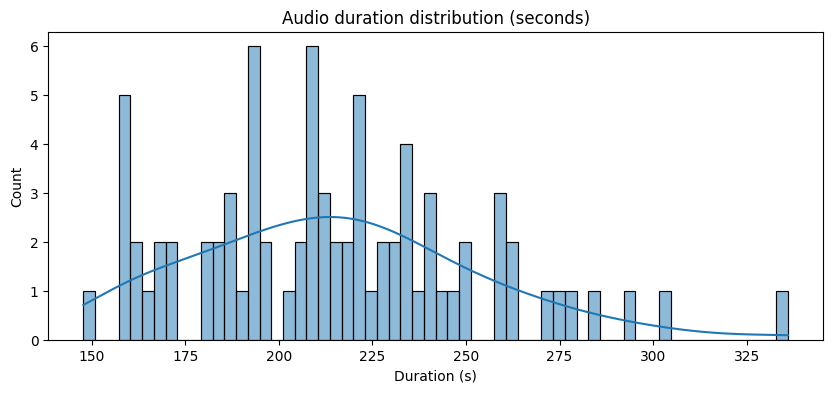

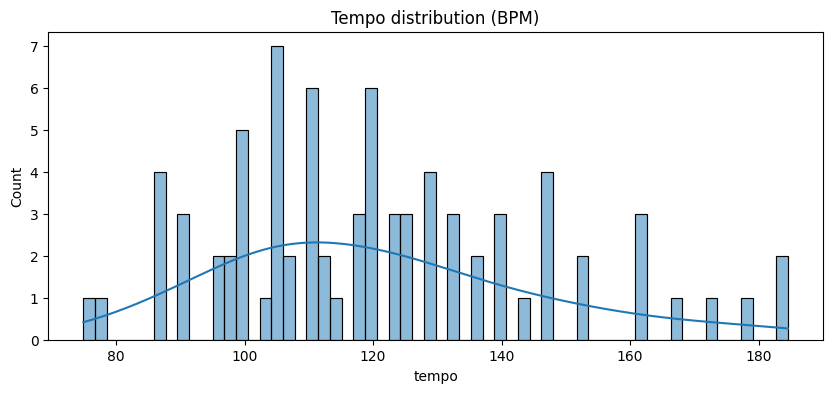

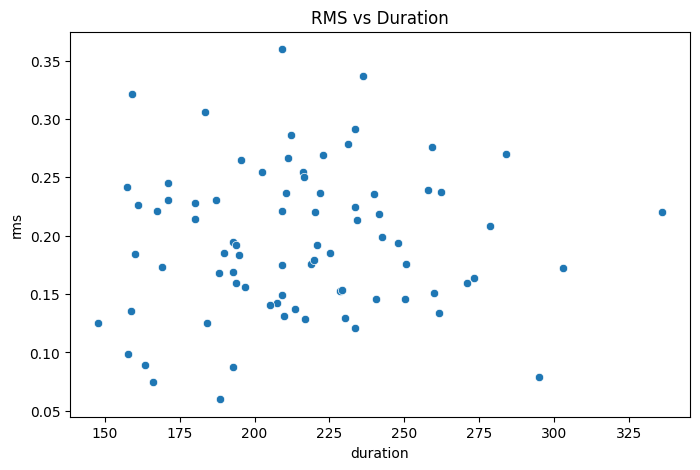

In [5]:
# Quick audio metadata summary and plots
display(audio_df.describe(include='all'))
# Duration distribution
plt.figure(figsize=(10,4))
sns.histplot(audio_df['duration'].dropna(), bins=60, kde=True)
plt.title('Audio duration distribution (seconds)')
plt.xlabel('Duration (s)')
plt.savefig(results_dir / 'duration_distribution.png', bbox_inches='tight')
plt.show()
# Tempo distribution
plt.figure(figsize=(10,4))
sns.histplot(audio_df['tempo'].dropna(), bins=60, kde=True)
plt.title('Tempo distribution (BPM)')
plt.savefig(results_dir / 'tempo_distribution.png', bbox_inches='tight')
plt.show()
# RMS vs duration scatter
plt.figure(figsize=(8,5))
sns.scatterplot(data=audio_df, x='duration', y='rms')
plt.title('RMS vs Duration')
plt.savefig(results_dir / 'rms_vs_duration.png', bbox_inches='tight')
plt.show()

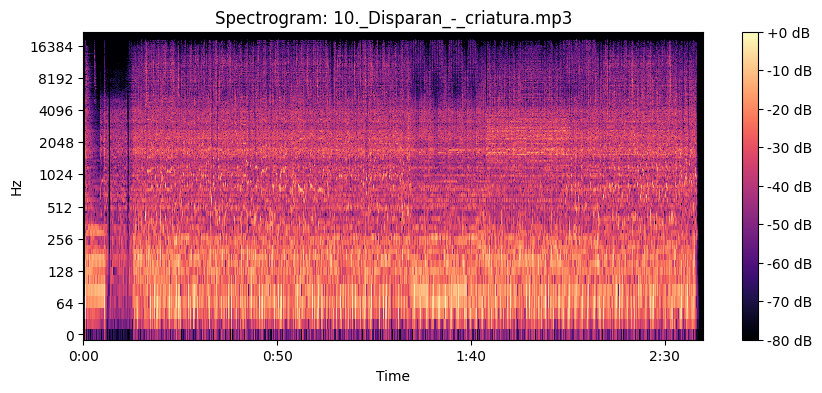

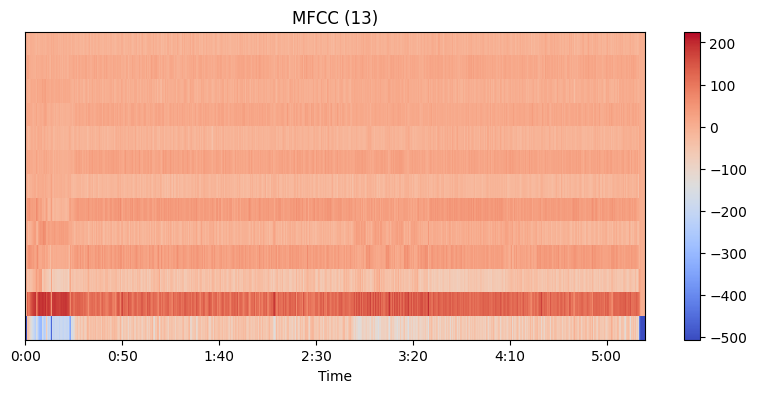

In [6]:
# Plot example spectrogram and MFCC for a short example (first non-empty audio)
example_row = audio_df.dropna(subset=['duration']).query('duration>0').iloc[0]
example_path = example_row['path']
y, sr = librosa.load(example_path, sr=None, mono=True)
# display spectrogram
plt.figure(figsize=(10,4))
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title(f"Spectrogram: {example_row['filename']}")
plt.savefig(results_dir / 'example_spectrogram.png', bbox_inches='tight')
plt.show()
# MFCC
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC (13)')
plt.savefig(results_dir / 'example_mfcc.png', bbox_inches='tight')
plt.show()

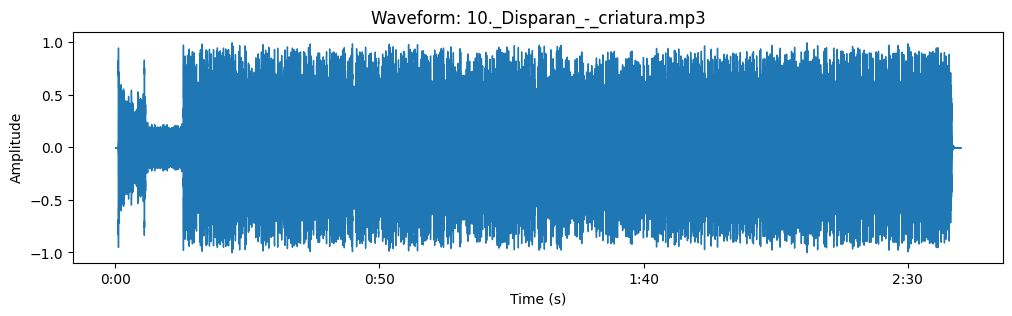

In [27]:
## Example waveform

# Plot waveform for an example audio file (uses existing `example_path` if available)
from pathlib import Path
try:
    path = example_path
except NameError:
    example_row = audio_df.dropna(subset=['duration']).query('duration>0').iloc[0]
    path = example_row['path']

y, sr = librosa.load(path, sr=None, mono=True)
plt.figure(figsize=(12,3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform: {Path(path).name}")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.savefig(results_dir / 'example_waveform.png', bbox_inches='tight')
plt.show()

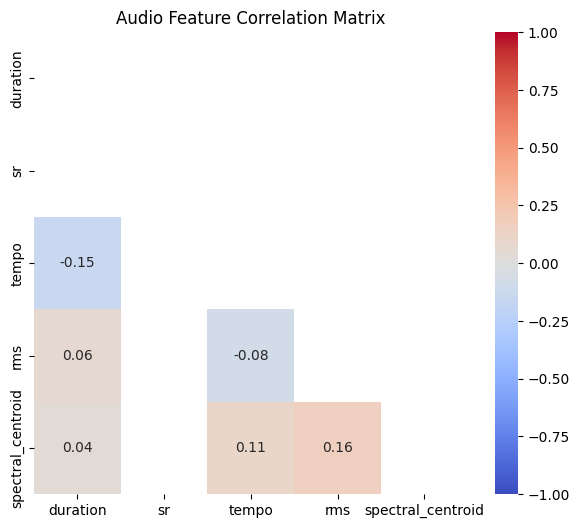

In [28]:
## Correlation matrix of audio features

# Compute correlation between numeric audio features and plot heatmap
features = ['duration','sr','tempo','rms','spectral_centroid']
# keep only available features
available = [f for f in features if f in audio_df.columns]
corr_df = audio_df[available].dropna().corr()

mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=(7,6))
sns.heatmap(corr_df, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Audio Feature Correlation Matrix')
plt.savefig(results_dir / 'correlation_matrix.png', bbox_inches='tight')
plt.show()

## Lyrics EDA: Tokenization, lengths, and top words

In [7]:
# Read all lyrics files and compute simple text stats
import re
from collections import Counter
lyrics_files = sorted([p for p in lyrics_dir.glob('**/*.txt') if p.is_file()])
print(f'Found {len(lyrics_files)} lyrics files')
lyrics_meta = []
all_tokens = []
for p in lyrics_files:
    try:
        text = p.read_text(encoding='utf-8', errors='ignore')
        # basic tokenization: lowercase, split on non-word, drop empties
        tokens = [t for t in re.split(r'\W+', text.lower()) if t]
        all_tokens.extend(tokens)
        lyrics_meta.append({'filename': p.name, 'path': str(p), 'chars': len(text), 'tokens': len(tokens)})
    except Exception as e:
        lyrics_meta.append({'filename': p.name, 'path': str(p), 'chars': None, 'tokens': None, 'error': str(e)})
lyrics_df = pd.DataFrame(lyrics_meta)
lyrics_df.to_csv(results_dir / 'lyrics_metadata.csv', index=False)
# top words across corpus
word_counts = Counter(all_tokens)
top_words = word_counts.most_common(50)
pd.DataFrame(top_words, columns=['word','count']).to_csv(results_dir / 'top_words.csv', index=False)
lyrics_df.head()

Found 158 lyrics files


,filename,path,chars,tokens
0,10._Disparan_-_criatura.txt,..\data\lyrics\10._Disparan_-_criatura.txt,1012,194
1,10._Disparan_-_criatura.words.txt,..\data\lyrics\10._Disparan_-_criatura.words.txt,1005,194
2,1_Freak_-_Automatisch_Gekommen.txt,..\data\lyrics\1_Freak_-_Automatisch_Gekommen.txt,1998,374
3,1_Freak_-_Automatisch_Gekommen.words.txt,..\data\lyrics\1_Freak_-_Automatisch_Gekommen....,1988,374
4,Avercage_-_Embers.txt,..\data\lyrics\Avercage_-_Embers.txt,985,202


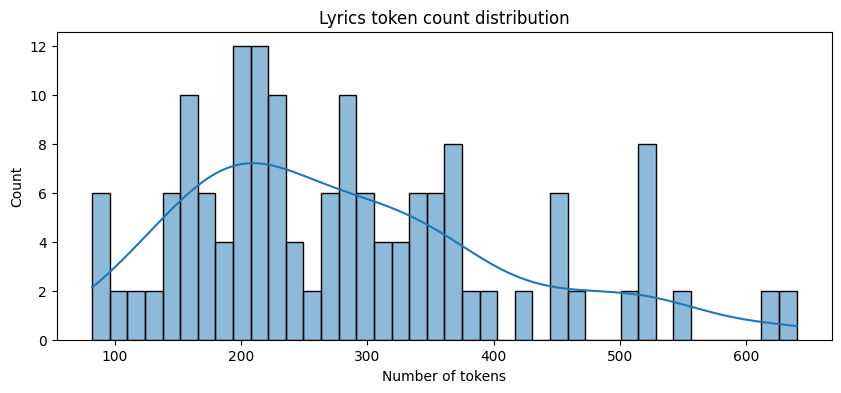

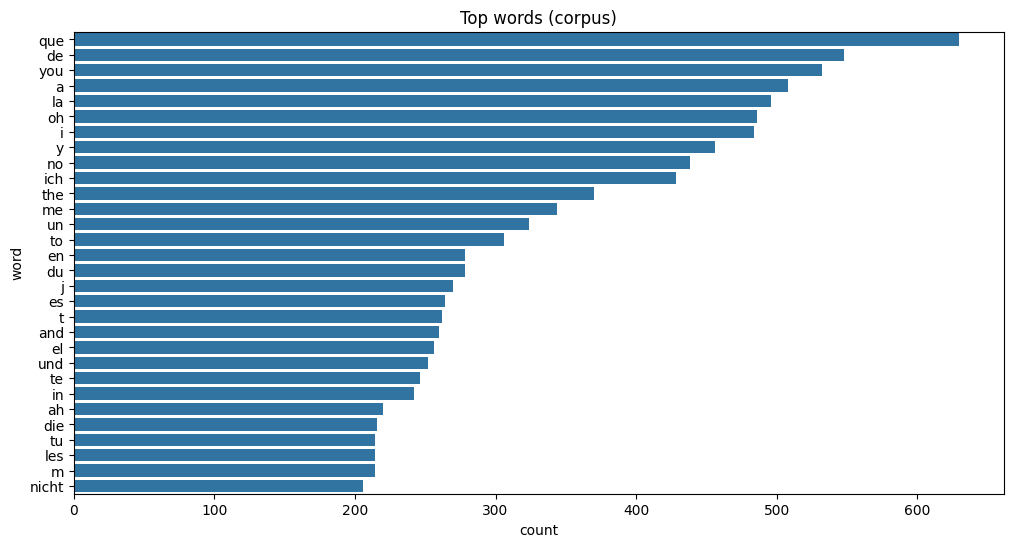

In [8]:
# Lyrics visualizations
plt.figure(figsize=(10,4))
sns.histplot(lyrics_df['tokens'].dropna(), bins=40, kde=True)
plt.title('Lyrics token count distribution')
plt.xlabel('Number of tokens')
plt.savefig(results_dir / 'lyrics_token_distribution.png', bbox_inches='tight')
plt.show()
# Top words barplot
top_df = pd.DataFrame(top_words, columns=['word','count']).head(30)
plt.figure(figsize=(12,6))
sns.barplot(data=top_df, y='word', x='count')
plt.title('Top words (corpus)')
plt.savefig(results_dir / 'top_words.png', bbox_inches='tight')
plt.show()

In [9]:
# Merge audio and lyrics metadata by filename base (best-effort)
from pathlib import Path as _Path

def stem(name):
    return _Path(name).stem.replace('.words','')

audio_df['stem'] = audio_df['filename'].apply(stem)
lyrics_df['stem'] = lyrics_df['filename'].apply(stem)
merged = audio_df.merge(lyrics_df, on='stem', how='outer', suffixes=('_audio','_lyrics'))
merged.to_csv(results_dir / 'merged_audio_lyrics.csv', index=False)
merged.head()

,filename_audio,path_audio,duration,sr,tempo,rms,spectral_centroid,stem,filename_lyrics,path_lyrics,chars,tokens
0,10._Disparan_-_criatura.mp3,..\data\audio\10._Disparan_-_criatura.mp3,160.000000,44100,97.508844,0.184533,3562.435657,10._Disparan_-_criatura,10._Disparan_-_criatura.txt,..\data\lyrics\10._Disparan_-_criatura.txt,1012,194
1,10._Disparan_-_criatura.mp3,..\data\audio\10._Disparan_-_criatura.mp3,160.000000,44100,97.508844,0.184533,3562.435657,10._Disparan_-_criatura,10._Disparan_-_criatura.words.txt,..\data\lyrics\10._Disparan_-_criatura.words.txt,1005,194
2,1_Freak_-_Automatisch_Gekommen.mp3,..\data\audio\1_Freak_-_Automatisch_Gekommen.mp3,188.400000,44100,99.384014,0.059924,3637.143692,1_Freak_-_Automatisch_Gekommen,1_Freak_-_Automatisch_Gekommen.txt,..\data\lyrics\1_Freak_-_Automatisch_Gekommen.txt,1998,374
3,1_Freak_-_Automatisch_Gekommen.mp3,..\data\audio\1_Freak_-_Automatisch_Gekommen.mp3,188.400000,44100,99.384014,0.059924,3637.143692,1_Freak_-_Automatisch_Gekommen,1_Freak_-_Automatisch_Gekommen.words.txt,..\data\lyrics\1_Freak_-_Automatisch_Gekommen....,1988,374
4,Avercage_-_Embers.mp3,..\data\audio\Avercage_-_Embers.mp3,242.556916,44100,129.199219,0.199064,2819.767407,Avercage_-_Embers,Avercage_-_Embers.txt,..\data\lyrics\Avercage_-_Embers.txt,985,202
